目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可是畫圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

作業: 取得另一個 dataset: titanic, 

(1) 做條形圖

(2) 利用 facet grid 繪圖並分析

(3) 繪製小提琴圖


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


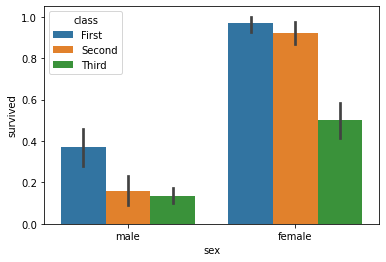

In [3]:
# 將每個班級中男性和女性的平均存活率用長形圖可視化
sns.barplot(x = 'sex', y='survived', hue = 'class', data = df)

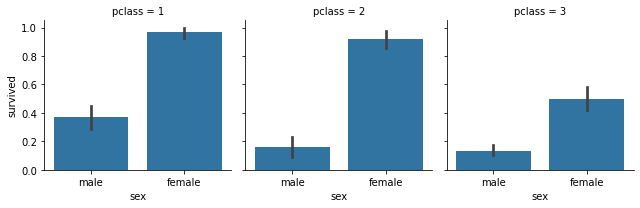

In [4]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col = 'pclass')
g.map(sns.barplot, "sex",'survived', order = ['male', 'female'])

In [5]:
survived = df.groupby(['pclass', 'sex']).survived.sum()
survived

pclass  sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: survived, dtype: int64

In [6]:
survived_counts = pd.crosstab([df.pclass, df.sex], df.survived)
survived_counts 

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

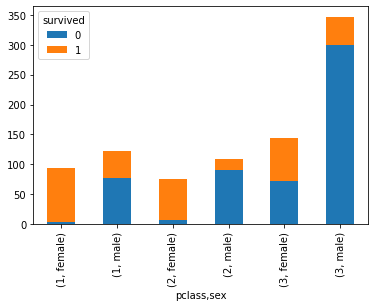

In [7]:
survived_counts.plot.bar(stacked = True)

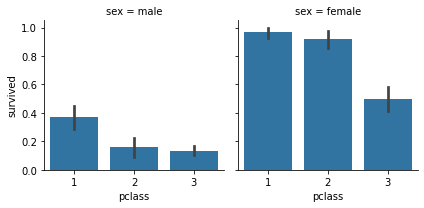

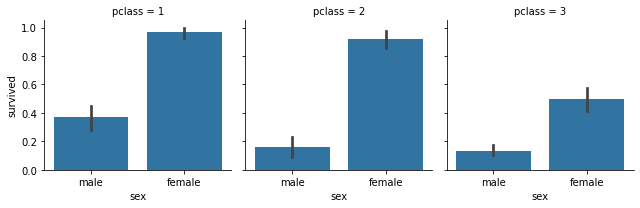

In [8]:
g = sns.FacetGrid(df, col = 'sex')
g.map(sns.barplot, 'pclass', 'survived', order = [1, 2, 3])
g = sns.FacetGrid(df, col = 'pclass')
g.map(sns.barplot, "sex",'survived', order = ['male','female'])